# Linear Regression

In [1]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt

In [2]:
PROJECT_ROOT_DIR = "./"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "img")
os.makedirs(IMAGES_PATH, exist_ok=True)
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
DATA_PATH = os.path.join(PROJECT_ROOT_DIR, "data")

In [3]:
def load_csv(path=DATA_PATH, fich="ex1data1.csv"):
    os.makedirs(path, exist_ok=True)
    csv_path = os.path.join(path,fich)
    datos = pd.read_csv(csv_path, header=None).values
    return datos.astype(float)

In [4]:
datos = load_csv()
type(datos)

numpy.ndarray

In [5]:
X = datos[:, :-1] #Coge desde la primera hasta la ultima columna (no incluida) 
np.shape(X) # (97, 1)
Y = datos[:, -1] #Coge la ultima columna
np.shape(Y) # (97,)

m = np.shape(X)[0]
n = np.shape(X)[1]


X = np.hstack([np.ones([m,1]),X])

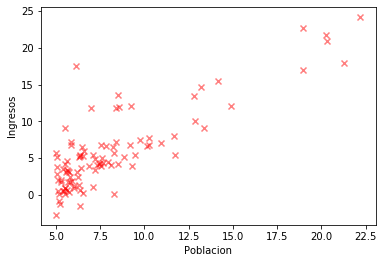

In [24]:
plt.figure()
plt.scatter(X[:,-1], Y, c='r', marker='x', alpha=0.5)
plt.ylabel("Ingresos")
plt.xlabel("Poblacion")
plt.show()

Regresion lineal a mano, probando valores 

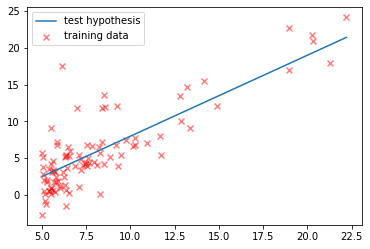

In [7]:
x = np.linspace(min(X[:,-1]), max(X[:,-1]))
y_test = -3 + 1.1*x

plt.scatter(X[:,-1], Y, c='r', marker='x', alpha=0.5, label="training data")
plt.plot(x,y_test, label="test hypothesis")
plt.legend()
plt.show()

Cost function (squared error function)

$J(\theta_{0},\theta_{1}) = \frac{1}{2m} \sum_{i=1}^{m}{(h_{\theta}(x^{(i)}) - y^{(i)})^{2}}$

Empezar con algun valor para $\theta_{0},\theta_{1}$ por ejemplo (0,0)

[0.71535047 0.71227266]
6.426660603085995
[-0.67439763  0.86941076]
5.421715612453519
[-1.65019523  0.96744021]
4.936051731272222
[-3.58717131  1.16203047]
4.485641957535552
Saving figure Hypothesis_1var


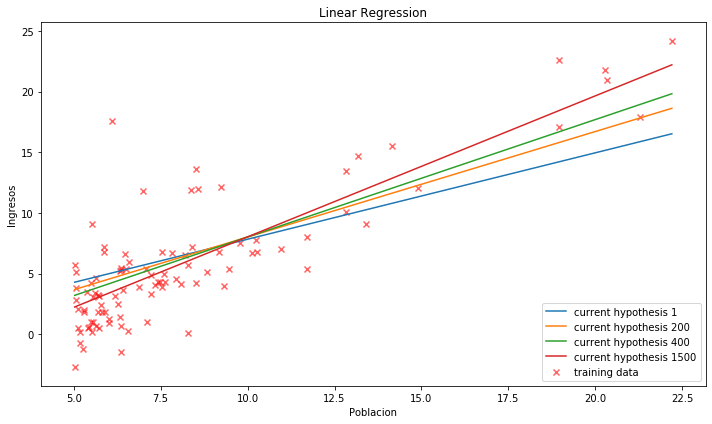

In [42]:
def coste(X, Y, Theta):
    H = np.dot(X, Theta)
    Aux = (H - Y) ** 2
    return Aux.sum() / (2* len(X))

def gradiente(X, Y, Theta, alpha):
    NuevaTheta = Theta
    m = np.shape(X)[0]
    n = np.shape(X)[1]
    H = np.dot(X, Theta)
    Aux = (H - Y)
    for i in range(n):
        Aux_i = Aux * X[:, i]
        NuevaTheta -= (alpha / m) * Aux_i.sum()
    return NuevaTheta

def descenso_gradiente(X,Y,alpha,Theta):
    NuevaTheta = Theta
    m = np.shape(X)[0]
    n = np.shape(X)[1]
    H = np.dot(X, Theta)
    Aux = (H - Y)
    for i in range(n):
        Aux_i = Aux * X[:, i]
        NuevaTheta[i] -= (alpha / m) * Aux_i.sum()
    return NuevaTheta, coste(X,Y,Theta)


mostrar = [1,200,400,1500]
alpha = 0.01
Theta = np.array([np.random.random(),np.random.random()])
plt.figure(figsize=(10,6))
#Theta, coste = descenso_gradiente(X,Y,alpha,[np.random.random(),np.random.random()])
for i in range(1500):
        Theta, costes = descenso_gradiente(X,Y,alpha,Theta)
        if i+1 in mostrar:
            y = Theta[0] + Theta[1]*x
            plt.plot(x,y, label="current hypothesis {}".format(i+1))
            print(Theta)
            print(costes)
            #plt.show()
#print(Theta)
#print(costes)

plt.scatter(X[:,-1], Y, c='r', marker='x', alpha=0.6, label="training data")
plt.legend(loc='lower right')
plt.title("Linear Regression")
plt.xlabel("Poblacion")
plt.ylabel("Ingresos")
save_fig("Hypothesis_1var")
plt.show()

# Linear Regression with multiple variables

In [32]:
datos = load_csv(fich="ex1data2.csv")
type(datos)

numpy.ndarray